# Welcome, Bishop Ireton Hackers!

This tutorial leads you through the steps of a basic data mining pipeline:
1. Define your problem
2. Identify your data
3.  ,-------> Explore your data ----------
4.  '-- Normalize and Clean your data <--'
5. Extract information

If you're a pro, feel free to modify as you go or carve your own path.

In [2]:
# Make sure the following libraries work
# To troubleshoot: open the command line and check that it's installed, e.g. "which numpy"
# if it is not installed, simply install e.g. "pip install pandas"
# if it is installed, you might need to check your paths
from IPython.display import Image
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
import ast
from sklearn import preprocessing


## 1. Define your problem: What makes a good book-to-movie? 
Seriously though, why do so many good books become terrible movies? Take this conundrum, for example:

Mystic River. Written by Dennis Lehane, starring Sean Penn and Tim Robbins, directed by Clint Eastwood. Award-winning book, and award-winning movie.

Live By Night. Written by Dennis Lehane, starring Ben Affleck and Zoe Saldana, directed by Ben Affleck. Award-winning book, TERRIBLE movie. Even after it was adapted to film by the author himself.

I don't expect to solve all the mysteries here, but I'd like to get some general trends.

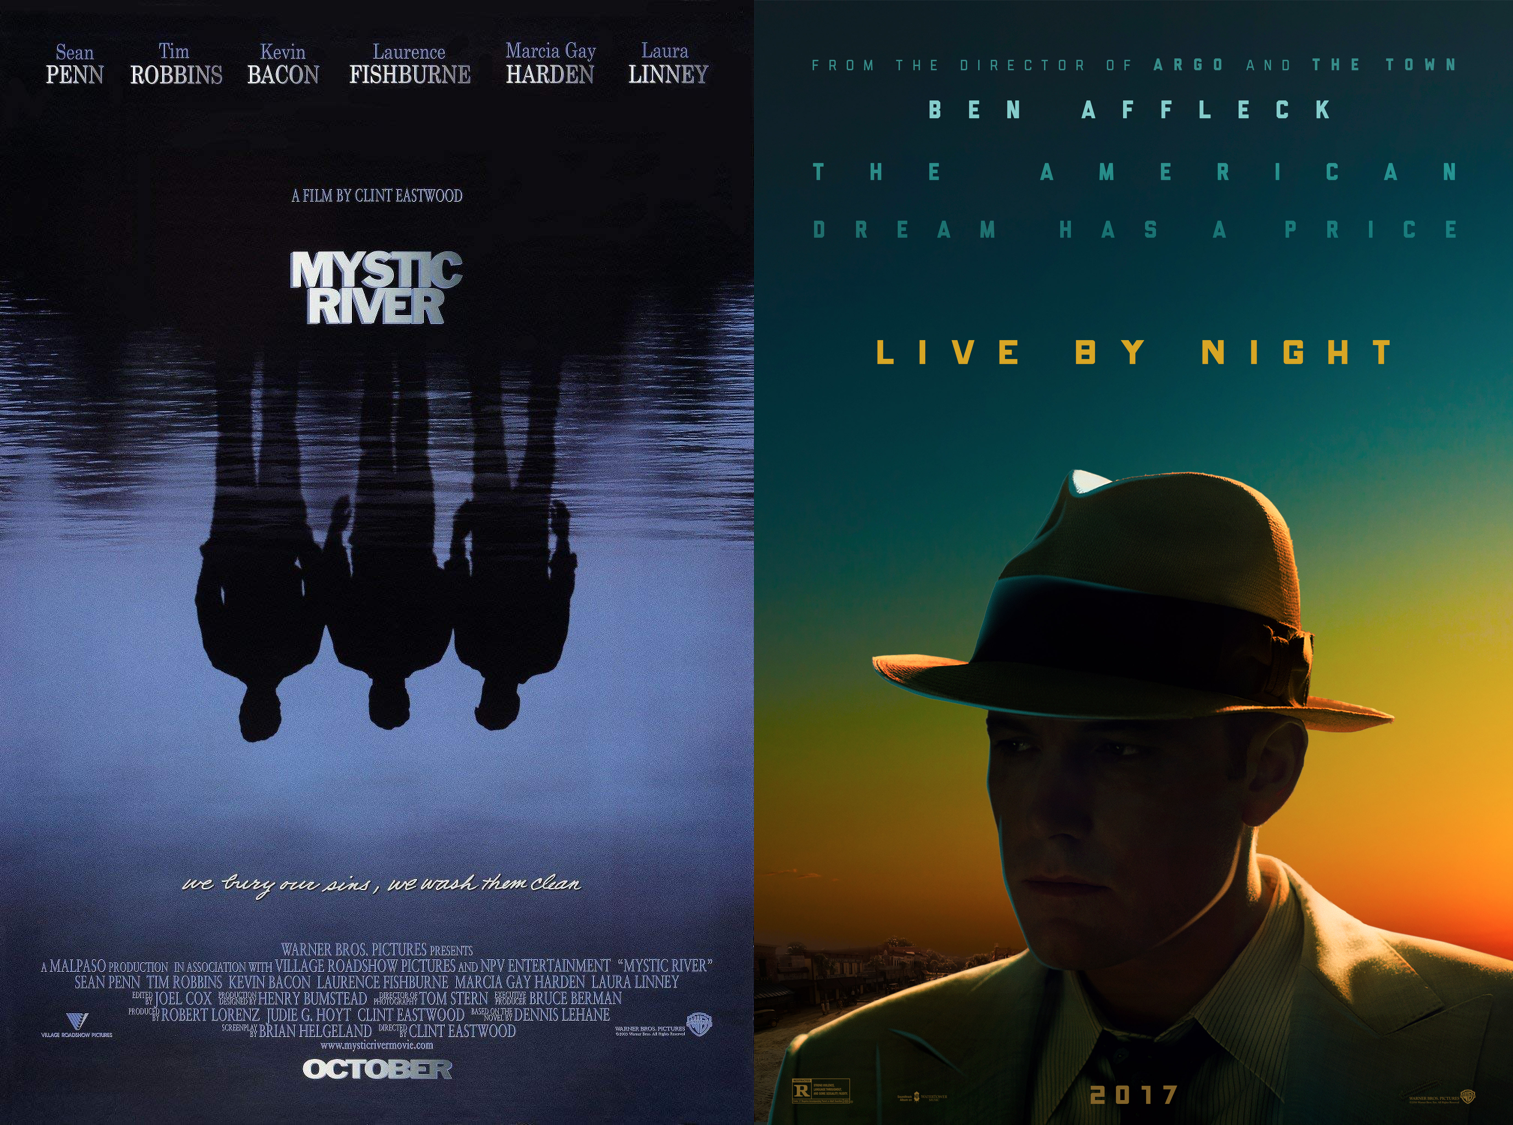

In [3]:
cwd = os.getcwd()
movie_posters = cwd+"/img/MoviePosters.png"
Image(movie_posters, width=400, height=400)

## 2. Identify your data. 

Let's use a subset of a dataset that I created, using goodreads and imdb.

For book data, I used the goodreads API https://www.goodreads.com/api, which I found pretty robust and easy-to-use, as far as API's go.

For movie data, IMDb has a huge volume of public data. You can download it in large chunks, https://www.imdb.com/interfaces/, or go through the API like I did (http://www.omdbapi.com/).

Holy crap there are a lot of books and movies! To link the two datasets, I went to wikipedia.
https://en.wikipedia.org/w/index.php?title=Category:American_novels_adapted_into_films&pageuntil=Burnt+Offerings+%28Marasco+novel%29#mw-pages


Some other great places to find free datasets:
https://www.kaggle.com/datasets
https://github.com/datasets
https://data.fivethirtyeight.com/
https://datasetsearch.research.google.com/
https://scikit-learn.org/stable/datasets/toy_dataset.html


## 3. Explore your data.

Start by importing the data and examining its structure.

In [6]:
# Data! Data! Data!
film_adaptations = []
with open(cwd+'/Books-to-Movies.txt') as f:
    for line in f.read().splitlines():
        d = (ast.literal_eval(line))
        film_adaptations.append(d)
    
# let's take a look at the information each entry has (the "keys") to get a sense of structure
for key in film_adaptations[0].keys():
    print(key,type(key))
    
# We'll keep this list handy, since we'll be referencing these keys to select our data

goodreads_id <class 'str'>
title <class 'str'>
average_rating <class 'str'>
ratings_count <class 'str'>
publication_date <class 'str'>
author_name <class 'str'>
author_id <class 'str'>
wiki_book_link <class 'str'>
mTitle <class 'str'>
mRated <class 'str'>
mReleased <class 'str'>
mLength <class 'str'>
mGenre <class 'str'>
mDirector <class 'str'>
mWriters <class 'str'>
mActors <class 'str'>
mAwards <class 'str'>
m_imdb_Rating <class 'str'>
m_imdb_Votes <class 'str'>
m_imdb_ID <class 'str'>
mStudio <class 'str'>
mPlot <class 'str'>


In [7]:
# Transform to dataframe
# Let's shift to pandas for more flexible handling and better features (like sample!). 
# to learn more about the pandas data science toolsuite: https://pandas.pydata.org/ 
df = pd.DataFrame(film_adaptations)

# print a row, and print the top (head) of a column
print('A row:',df.sample())

print('/nA column:',df['mActors'].head())


A row:      goodreads_id                title average_rating ratings_count  \
1499       720833  Harnessing Peacocks           3.86          1017   

     publication_date  author_name author_id             wiki_book_link  \
1499           //1985  Mary Wesley     87093  /wiki/Harnessing_Peacocks   

                   mTitle mRated  ...                  mGenre  \
1499  Harnessing Peacocks    N/A  ...  Comedy, Drama, Romance   

               mDirector                                         mWriters  \
1499  James Cellan Jones  Mary Wesley (novel), Andrew Davies (screenplay)   

                                                mActors mAwards m_imdb_Rating  \
1499  Serena Scott Thomas, Peter Davison, John Mills...     N/A           6.4   

     m_imdb_Votes  m_imdb_ID mStudio  \
1499          159  tt0104392     N/A   

                                                  mPlot  
1499  The beautiful Hebe Rutter (Serena Scott Thomas...  

[1 rows x 22 columns]
/nA column: 0    Tommy Kelly, 

In [ ]:
# Now that it's all in a nice dataframe, let's make sure numeric columns are formatted as numeric instead of string
df['ratings_count'] = df['ratings_count'].astype(float)
df['m_imdb_Rating'] = df['m_imdb_Rating'].astype(float)
df['m_imdb_Votes'] = df['m_imdb_Votes'].astype(float)

# convert date time objects
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')
df['mReleased'] = pd.to_datetime(df['mReleased'], errors='coerce')

In [8]:
# Formatting the output
# And lets examine some random samples and practice accessing values based on key.
for i in range(5):
    row=df.sample()
    
    print('{} was written by {} in {}, and had an average rating of {}\n'.format(
                        row['title'].values[0],
                        row['author_name'].values[0],
                        row['publication_date'].values[0][-4:],
                        row['average_rating'].values[0]))

The Russia House was written by John le Carré in 1989, and had an average rating of 3.91

Awakenings was written by Oliver Sacks in 1973, and had an average rating of 4.10

The Children Act was written by Ian McEwan in 2014, and had an average rating of 3.70

Sex and The Single Girl was written by Helen Gurley Brown in 1962, and had an average rating of 3.39

The Pact was written by Jodi Picoult in 1998, and had an average rating of 4.01



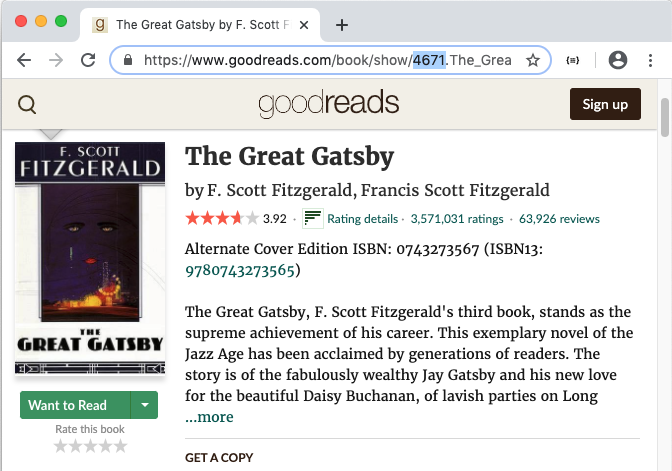

In [9]:
# For practice, look up the goodreads id of your favorite film-adapted book
# https://www.goodreads.com/book/
# The goodreads id preceeds the book title in the web address, highlighted below in blue
Image(cwd+"/img/how_to_find_gr_id.png", width=500, height=300)

In [16]:
# Access the row of the desired film adaptation

grID = '41865'  # <------ edit this variable with the goodreads ID you just looked up

row = df.loc[df['goodreads_id'] == grID]

# you can print the whole row, or just extract the key value you want
print('title of row',row['title']) # <---- edit this line to access a different value, like 'average_rating'


title of row 1281    Twilight (Twilight, #1)
Name: title, dtype: object


good reads ratings:
 0    3.91
1    4.02
2    3.88
3    3.93
4    3.91
Name: average_rating, dtype: float64


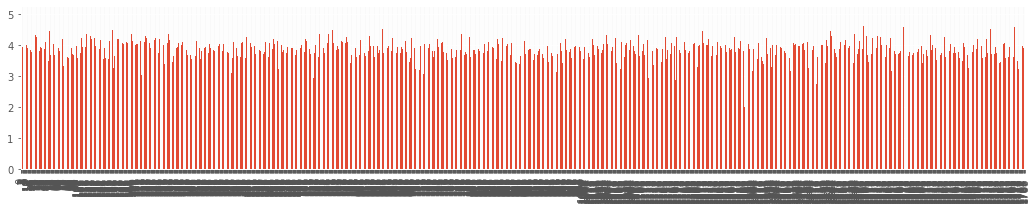

In [18]:
# What do other book ratings look like?
df['average_rating'] = df['average_rating'].astype(float)

print('good reads ratings:\n',df['average_rating'].head())

# Plot goodreads ratings
plt.rcParams["figure.figsize"] = (18,3)
df['average_rating'].plot(kind='bar')

## 3. Normalize and clean your data.

Normalizing, cleanding, transforming... These terms are thrown used loosely but have very concrete meanings in practice. For more: https://www.statisticshowto.com/normalized/

If you notice errors or something missing, please please please mention it in the comments so the quality of this dataset can be improved!

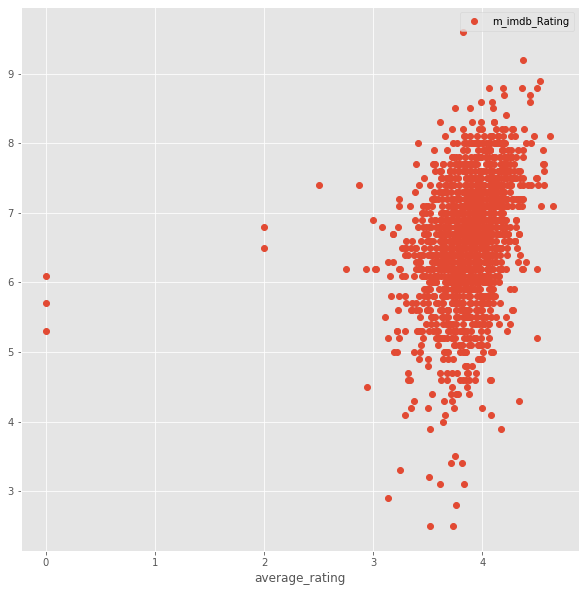

In [19]:
#Plot goodreads ratings (average_rating) against imdb ratings (m_imdb_Rating)
#recall all our key values are in string format, so we need to convert to numeric
df['m_imdb_Rating'] = pd.to_numeric(df['m_imdb_Rating'],errors='coerce')

df.plot(x='average_rating',y='m_imdb_Rating',style='o',figsize=(10,10))

In [13]:
# Let's explore the outliers
print('outliers:',df[df['average_rating']< 2.25])

outliers:      goodreads_id                           title  average_rating  \
376      49767329  The Border Legion: (Annotated)             2.0   
528      42038085             The Duke Comes Back             0.0   
863       5691409          Mr. Barnes of New York             0.0   
1289     31434327              Action for Slander             2.0   
1574     25346989                    Letty Lynton             0.0   
1773     42196451               Sparkling cyanide             0.0   

     ratings_count publication_date                 author_name author_id  \
376              1               //                   Zane Grey     18134   
528              0           //1933                 Lucian Cary   6561839   
863              0         9/1/2007  Archibald Clavering Gunter   1241291   
1289             1               //                 Mary Borden   1282034   
1574             0           //1932        Marie Belloc Lowndes     85931   
1773             0               //         

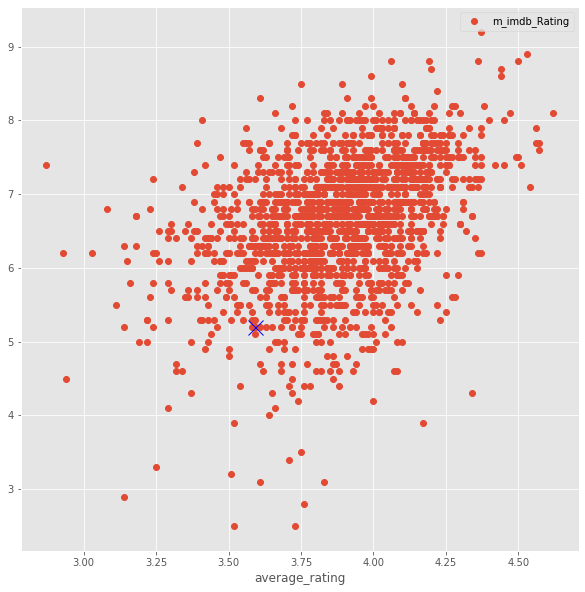

In [26]:
# Although these classics made ok movies, there are really too few book reviews for goodreads
# scores to have any credibility. Let's establish a review count threshold for quality.

df = df[df['ratings_count'].astype(float)>19] # for goodreads


# repeat for imdb, then replot
df['m_imdb_Votes'] = pd.to_numeric(df['m_imdb_Votes'],errors='coerce')
df = df[df['m_imdb_Votes']>19]


df.plot(x='average_rating',y='m_imdb_Rating',style='o',figsize=(10,10))

# plot a Marker for your favorite film adaptaion on top of the other data
# use the grID variable you set up earlier
row = df.loc[df['goodreads_id'] == grID]
plt.plot(row['average_rating'],row['m_imdb_Rating'], marker='x', markersize=15, color="blue")


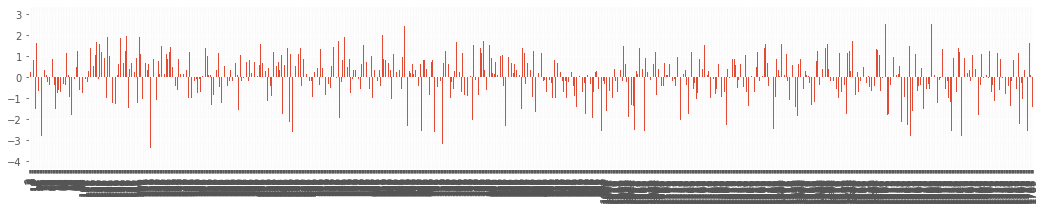

In [29]:
# Before we move on to determining what is statistically significant any given column, we need to  
# transform each numeric column to be reflective of what is statistically significant

# normalize the data
from sklearn.preprocessing import scale
df['scaled_gr'] = scale(df['average_rating'].astype(float))

# Plot goodreads ratings AFTER normalizing
plt.rcParams["figure.figsize"] = (18,3)
df['scaled_gr'].plot(kind='bar')

# https://bruchez.blogspot.com/2017/12/having-fun-with-imdb-dataset-files.html
# lots of cool data science tutorials on sci kit learn: https://scikit-learn.org/stable/ 

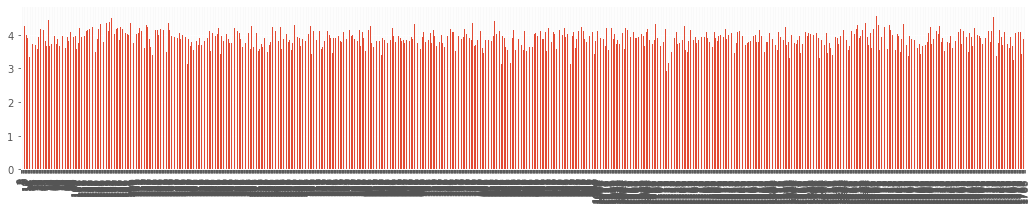

In [30]:
# Let's compare this to what the data would have looked like BEFORE normalizing:

# Plot goodreads ratings WITHOUT normalization
plt.rcParams["figure.figsize"] = (18,3)
df['average_rating'].plot(kind='bar')


## 5. Extract Information

Let's start by analyzing what makes a good film adaptation, vice a bad one.

In [38]:
# Create two more columns, labeling each row as either a good/bad book, and a good/bad movie
df.loc[((df['scaled_imdb']>=0) & (df['scaled_gr']<0)),'Adaptation_Category'] = 1 # good movie, bad book
df.loc[((df['scaled_imdb']>=0) & (df['scaled_gr']>=0)),'Adaptation_Category'] = 2 # good movie, good book
df.loc[((df['scaled_imdb']<0) & (df['scaled_gr']>=0)),'Adaptation_Category'] = 3 # bad movie, good book
df.loc[((df['scaled_imdb']<0) & (df['scaled_gr']<0)),'Adaptation_Category'] = 4 # bad movie, bad book

print(df['Adaptation_Category'])

0       2.0
1       2.0
3       2.0
4       2.0
5       2.0
       ... 
1782    2.0
1784    3.0
1786    3.0
1787    4.0
1788    3.0
Name: Adaptation_Category, Length: 1641, dtype: float64


In [39]:
# Chart out some numeric columns
df[['Adaptation_Category','ratings_count','m_imdb_Votes']].groupby("Adaptation_Category").mean()

,ratings_count,m_imdb_Votes
Adaptation_Category,,
1.0,67605.432234,37229.010989
2.0,245901.841071,108687.257143
3.0,135335.444805,26359.870130
4.0,75113.244000,18229.978000


In [45]:
from collections import Counter
# put the non-numeric data into a numeric format
bad_books_good_movies = df[df['Adaptation_Category']==1]
good_books_good_movies = df[df['Adaptation_Category']==2]
good_books_bad_movies = df[df['Adaptation_Category']==3]
bad_books_bad_movies = df[df['Adaptation_Category']==4]

# Let's grab all the actors from bad books, but good movies
bbgm_Actors = []
for actors_in_a_given_movie in bad_books_good_movies['mActors'].values.tolist():    
    bbgm_Actors += actors_in_a_given_movie.split(', ')
        
print("Top actors for good film adaptations:")
            
print(Counter(bbgm_Actors).most_common(50))



Top actors for good film adaptations:
[('Ronald Colman', 5), ('Sean Connery', 4), ('Albert Finney', 4), ('Meryl Streep', 4), ('Emily Blunt', 4), ('Christopher Plummer', 4), ('Alan Bates', 3), ('Michael Caine', 3), ('Gary Cooper', 3), ('Anthony Quinn', 3), ('Arthur Kennedy', 3), ('Stanley Tucci', 3), ('Julie Harris', 3), ('Dustin Hoffman', 3), ('Ben Kingsley', 3), ('Om Puri', 3), ('James McAvoy', 3), ('Judy Davis', 3), ('Judi Dench', 3), ('Tom Courtenay', 3), ('Cyril Cusack', 2), ('Rachel Roberts', 2), ('Tim Curry', 2), ('Anthony Andrews', 2), ('Anne Shirley', 2), ('Jennifer Jason Leigh', 2), ('Maggie Smith', 2), ('Ben Chaplin', 2), ('Julianne Moore', 2), ('Francesca Annis', 2), ('John Gielgud', 2), ('Eric Porter', 2), ('Oliver Reed', 2), ('Glenda Jackson', 2), ('Tom Cruise', 2), ('Clint Eastwood', 2), ('Gene Hackman', 2), ('Robert Morse', 2), ('Diane Lane', 2), ('Sandra Oh', 2), ('Lindsay Duncan', 2), ('Matt Damon', 2), ('Thomas Haden Church', 2), ('Fred MacMurray', 2), ('Fred Stone', 

In [46]:
# Let's compare this to all the actors from good movies, but bad books
gbbm_Actors = []
for actors_in_a_given_movie in good_books_bad_movies['mActors'].values.tolist():    
    gbbm_Actors += actors_in_a_given_movie.split(', ')
    
print("Top actors for bad film adaptations (Who ruined the book???):")

print(Counter(gbbm_Actors).most_common(50))


Top actors for bad film adaptations (Who ruined the book???):
[('Anthony Hopkins', 4), ('Chloë Grace Moretz', 3), ('Kate Winslet', 3), ('Henry Thomas', 3), ('Dean Martin', 3), ('Aldo Ray', 3), ('Alexandra Daddario', 3), ('Paul Newman', 3), ('Freddie Jones', 3), ('James Cromwell', 3), ('Nicole Kidman', 3), ('Michael Caine', 3), ('Anna Karina', 3), ('Tim Guinee', 2), ('Sienna Guillory', 2), ('David Hemmings', 2), ('Jeremy Irons', 2), ('Michael York', 2), ('Jack Hawkins', 2), ('Mel Smith', 2), ('Rod Steiger', 2), ('Lisa Ray', 2), ('Sheetal Sheth', 2), ('Hayden Christensen', 2), ('Robert Downey Jr.', 2), ('Ken Jenkins', 2), ('Alec Baldwin', 2), ('Dakota Fanning', 2), ('John Travolta', 2), ('Greg Kinnear', 2), ('Jim Carrey', 2), ('Matt Damon', 2), ('Rob Lowe', 2), ('Will Rothhaar', 2), ('Ed Helms', 2), ('Zac Efron', 2), ('Diane Lane', 2), ('Barbara Hershey', 2), ('Nick Nolte', 2), ('Mary Steenburgen', 2), ('Jimmy Bennett', 2), ('Elle Fanning', 2), ('Justice Smith', 2), ('Penélope Cruz', 2),

goodreads_id <class 'str'>
title <class 'str'>
average_rating <class 'str'>
ratings_count <class 'str'>
publication_date <class 'str'>
author_name <class 'str'>
author_id <class 'str'>
wiki_book_link <class 'str'>
mTitle <class 'str'>
mRated <class 'str'>
mReleased <class 'str'>
mLength <class 'str'>
mGenre <class 'str'>
mDirector <class 'str'>
mWriters <class 'str'>
mActors <class 'str'>
mAwards <class 'str'>
m_imdb_Rating <class 'str'>
m_imdb_Votes <class 'str'>
m_imdb_ID <class 'str'>
mStudio <class 'str'>
mPlot <class 'str'>

Thanks so much for hacking along, Bishop Ireton! Please see my github project page https://github.com/ravedawg/HackBI to cite this work, leave a comment, follow, or collaborate!